# Python科学计算神器Numpy-4：结构数组
                                                   --By Li Michael

## 一. 为什么需要结构数组
数据分析过程中，经常会有多种不同数据类型同时出现，而不仅仅是期望的数值型数据，而Array只能含有一种数据类型，Numpy/pandas该如何处理呢？在C语言中经常通过结构体struct来定义不同数据类型形成结构类型，结构中的字段占据连续的内存空间，每个结构体占用的内存大小均相同，类似的Numpy可以很容易的定义结构数组。和C语言一样，在Numpy中也可以操作这些字段对这种结构数组进行操作。只要Numpy的结构和C语言中的定义相同，Numpy就可以很方便地读取C语言的结构数组的二进制数据，转换为Numpy的结构数组。

例如，我们定义一个结构数组，它的每个元素有name,age和weight字段。在Numpy中可以如下定义：

In [1]:
import numpy as np
np.array([1,2,'a'])  ## 数据类型升级为string，其他类似C语言数据类型转换规则, 不会出现多种数据类型

array(['1', '2', 'a'],
      dtype='|S21')

## 二. 定义结构数组
现在我们定义一个结构数组，它的每个元素有name,age和weight字段。在Numpy中可以如下定义：

In [2]:
persontype = np.dtype({
    "names":["name", "height", "weight"],
    "formats":["S32", "i", "f"]
})
p = np.array([("Lee", 180, 74.5), ("Zhang", 170, 55)],
             dtype=persontype)

我们创建一个dtype对象persontype，通过其字典参数描述结构类型的各个字段。字典有两个关键字：names、formats. 每个关键字对应的值都是一个列表, names定义结构中的每个字段名,formats则定义每个字段的数据类型:
* S32: 32个字节的字符串类型, 由于结构中每个元素的大小必须固定, 因此需要指定字符串的长度
* i: 32bit的整数类型, 相当于np.int32
* f: 32bit的单精度浮点数, 相当于np.float32

然后我们调用array函数创建数组, 通过关键字参数dtype=persontype, 指定所创建的数组的元素类型维结构数组persontype. 可以看到数组p的元素类型:

In [3]:
p.dtype

dtype([('name', 'S32'), ('height', '<i4'), ('weight', '<f4')])

这里我们看到了另一种描述结构类型的方法: 一个包含多个组元的列表,其中如 (字段名, 类型描述) 的组元来描述结构数组中的每个字段. 类型描述前面的"|","<",">"描述了字段值的字节顺序:
* |: 忽视字节顺序
* <: 低位字节在前, 即大段序
* \>: 高位字节在前, 即小端序

### 2.1 四种定义方法
结构数组有四种定义方式，即表述dtype对象结构的参数方式：
* 1. string
* 2. tuple
* 3. list
* 4. dict

上面例子即为dict定义的dtype结构类型。

#### 2.1.1 string参数
dtype类型用一个逗号分割数据类型的string，每个类型对一个的数据采用默认名字‘f0’、‘f1’、‘f2’...，数据类型有四种形式：
* a) b1, i1, i2, i4, i8, u1, u2, u4, u8, f2, f4, f8, c8, c16, a<n>
   (分别对应 bytes, ints, unsigned ints, floats, complex and
    fixed length strings of specified byte lengths-固定字节长度的字符串)
* b) int8,...,uint8,...,float16, float32, float64, complex64, complex128 (这里是按位长计算bit sizes)
此外还有 Numerric/numarray类型（如Float32）和单字符类型（如H代表usigned short ints），但已弃用，就不建议使用了。

In [4]:
x = np.zeros(3, dtype='3int, float32, (2,3)float64')
x

array([([0, 0, 0],  0., [[ 0.,  0.,  0.], [ 0.,  0.,  0.]]),
       ([0, 0, 0],  0., [[ 0.,  0.,  0.], [ 0.,  0.,  0.]]),
       ([0, 0, 0],  0., [[ 0.,  0.,  0.], [ 0.,  0.,  0.]])],
      dtype=[('f0', '<i8', (3,)), ('f1', '<f4'), ('f2', '<f8', (2, 3))])

#### 2.1.2 tuple参数
元组仅适用于结构的数据和现有的数据类型对应的结构数组，呈元组对出现.

In [5]:
x = np.zeros(3, dtype=('i4', [('r','u1'), ('g','u1'), ('b','u1'), ('a','u1')]))
x['r']

array([0, 0, 0], dtype=uint8)

#### 2.1.3 list参数
dtype由一组tuple的list定义，每个元组包含2-3个元素：1）数据结构域的名字，2）对应的数据类型，3)数据域的shape(可选). 

In [6]:
x = np.zeros(3, dtype=[('x', 'f4'), ('y', np.float32), ('value', 'f4', (2,2))])
x

array([( 0.,  0., [[ 0.,  0.], [ 0.,  0.]]),
       ( 0.,  0., [[ 0.,  0.], [ 0.,  0.]]),
       ( 0.,  0., [[ 0.,  0.], [ 0.,  0.]])],
      dtype=[('x', '<f4'), ('y', '<f4'), ('value', '<f4', (2, 2))])

#### 2.1.4 dict参数
有两种不同的形式，一种字典是必须含'names'和'formats'关键字，对应一个相同长度的list，其中'names'必须是字符串. 另有两个可选关键字'offsets'和'titles', 'offsets'对应的list是每个数据域字节为单位偏移量, 'titles'对应的list是数据域元数据的对象. 开始的例子便是此种类型.

In [7]:
x1 = np.zeros(3, dtype={'names':['col1', 'col2'], 'formats':['i4', 'f4']})
x1

array([(0,  0.), (0,  0.), (0,  0.)],
      dtype=[('col1', '<i4'), ('col2', '<f4')])

另一种字典是以数据域name做keys, 对应的value为含有(type,offset,title)的tuple, 其中title可选. 由于dict是没有顺序的, 每个数据域的顺序需要在定义时给出, 这个即是offset. 如height字段的偏移量为25个字节:

In [8]:
np.dtype({"name":("S25", 0), "age":(np.uint8, 25)})

dtype([('name', 'S25'), ('age', 'u1')])

In [9]:
x1 = np.zeros(3, dtype={'col1':('i1',0,'title 1'), 'col2':('f4',1,'title 2')})
x1

array([(0,  0.), (0,  0.), (0,  0.)],
      dtype=[(('title 1', 'col1'), 'i1'), (('title 2', 'col2'), '<f4')])

## 三. 混合结构数组
结构类型中可以包括其他结构类型, 下面创建一个有一个字段f1的结构, f1的值是另外一个结构f2, 其类型为16bit的整数.

In [10]:
np.dtype([("f1", [("f2", np.int16)])])

dtype([('f1', [('f2', '<i2')])])

当某个字段类型为数组时, 用组元的第三个参数表示, 下面描述的f1字段是一个shape为(2, 3)的双精度浮点数组:

In [11]:
np.dtype([("f0", "i4"), ("f1", "f8", (2, 3))])

dtype([('f0', '<i4'), ('f1', '<f8', (2, 3))])

## 四. 结构数组的存取
结构数组的存取和一般array相同, 通过下标即可, 需要注意的是元素的值虽然看着像组元, 但实际上是个结构数组:

In [12]:
p[0], p[0].dtype.names

(('Lee', 180,  74.5), ('name', 'height', 'weight'))

In [13]:
p[0].dtype

dtype([('name', 'S32'), ('height', '<i4'), ('weight', '<f4')])

p[0]是一个结构元素, 它和a共享内存数据, 因而可以通过修改元素字段来改变原始结构数组中的对应字段:

In [14]:
c = p[1]
c["name"] = "Li"
p[1].dtype

dtype([('name', 'S32'), ('height', '<i4'), ('weight', '<f4')])

结构数组可以像dict一样通过下标获取对应的字段值:

In [15]:
b = p[:]["height"]
b

array([180, 170], dtype=int32)

In [16]:
b[0] = 200
p[0]["height"]

200

同样的, 结构数组也可以调用tostring()和tofile()方法, 直接输出数组p的二进制形式:

In [17]:
p.tofile("test.bin")

利用下面的C语言可以将test.bin文件中的数据读出来.

> C语言的结构体为了内存寻址方便, 会自动对较短字段填充一些字节, 称为内存对齐. 如果把下面的name[32]改为name[30], 由于内存对齐的原因, 在name和height中间会填补两个字节, 结构体大小并不改变. 因此如果numpy中锁配置的内存大小不符合C语言的对齐规范, 将会出现数据错位. 为了解决这个问题, 在创建dtype对象时, 可以传递参数align=True, 这样numpy的结构数组就和C语言的结构体的内存对齐是一致的.

```C
#include <stdio.h>

struct person{
    char name[32];
    int height;
    float weight;
};

struct person p[2];

void main(){
    FILE *fp;
    int i;
    fp = fopen("test.bin", "rb");
    fread(p, sizeof(struct person), 2, fp);
    fclose(fp);
    for(i=0; i<2; i++)
        printf("%s %d %f\n", p[i].name, p[i].weight);
    getchar();
}
```

虽然上面罗嗦了这么多, 然而并没什么卵用, 对这类数据, 我们当然是交给将Numpy封装的更好的Pandas来处理了^_^

---
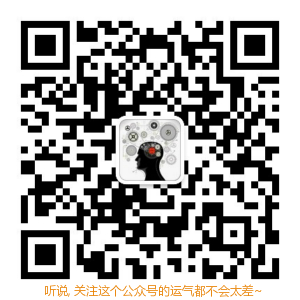